In [1]:
import spacy

In [2]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
nlp = spacy.load("en_core_web_lg")
nlp

In [4]:
doc = nlp("Elon Musk is the CEO of Tesla and SpaceX")

In [5]:
doc

Elon Musk is the CEO of Tesla and SpaceX

In [6]:
type(doc)

spacy.tokens.doc.Doc

In [7]:
doc.ents

(Elon Musk, Tesla, SpaceX)

In [8]:
doc.ents[0], type(doc.ents[0])

(Elon Musk, spacy.tokens.span.Span)

In [9]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

In [10]:
import json
with open('/content/Corona2.json', 'r') as f:
    data = json.load(f)

In [11]:
data['examples'][0]

{'id': '18c2f619-f102-452f-ab81-d26f7e283ffe',
 'content': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]",
 'metadata': {},
 'annotations': [{'id': '0825a1

In [12]:
data['examples'][0].keys()

dict_keys(['id', 'content', 'metadata', 'annotations', 'classifications'])

In [13]:
data['examples'][0]['content']

"While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]"

In [14]:
data['examples'][0]['annotations'][0]

{'id': '0825a1bf-6a6e-4fa2-be77-8d104701eaed',
 'tag_id': 'c06bd022-6ded-44a5-8d90-f17685bb85a1',
 'end': 371,
 'start': 360,
 'example_id': '18c2f619-f102-452f-ab81-d26f7e283ffe',
 'tag_name': 'Medicine',
 'value': 'Diosmectite',
 'correct': None,
 'human_annotations': [{'timestamp': '2020-03-21T00:24:32.098000Z',
   'annotator_id': 1,
   'tagged_token_id': '0825a1bf-6a6e-4fa2-be77-8d104701eaed',
   'name': 'Ashpat123',
   'reason': 'exploration'}],
 'model_annotations': []}

In [15]:
training_data = []
for example in data['examples']:
  temp_dict = {}
  temp_dict['text'] = example['content']
  temp_dict['entities'] = []
  for annotation in example['annotations']:
    start = annotation['start']
    end = annotation['end']
    label = annotation['tag_name'].upper()
    temp_dict['entities'].append((start, end, label))
  training_data.append(temp_dict)

print(training_data[0])

{'text': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]", 'entities': [(360, 371, 'MEDICINE'), (383, 408, 'MEDICINE'), (104, 112, 'MEDICALCONDITION'), (679,

In [16]:
training_data[0]['text']

"While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]"

In [17]:
training_data[0]['entities']

[(360, 371, 'MEDICINE'),
 (383, 408, 'MEDICINE'),
 (104, 112, 'MEDICALCONDITION'),
 (679, 689, 'MEDICINE'),
 (6, 23, 'MEDICINE'),
 (25, 37, 'MEDICINE'),
 (461, 470, 'MEDICALCONDITION'),
 (577, 589, 'MEDICINE'),
 (853, 865, 'MEDICALCONDITION'),
 (188, 198, 'MEDICINE'),
 (754, 762, 'MEDICALCONDITION'),
 (870, 880, 'MEDICALCONDITION'),
 (823, 833, 'MEDICINE'),
 (852, 853, 'MEDICALCONDITION'),
 (461, 469, 'MEDICALCONDITION'),
 (535, 543, 'MEDICALCONDITION'),
 (692, 704, 'MEDICINE'),
 (563, 571, 'MEDICALCONDITION')]

In [18]:
training_data[0]['text'][360:371]

'Diosmectite'

In [19]:
from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.blank("en") # load a new spacy model
doc_bin = DocBin()

In [20]:
from spacy.util import filter_spans

for training_example  in tqdm(training_data):
    text = training_example['text']
    labels = training_example['entities']
    doc = nlp.make_doc(text)
    ents = []
    for start, end, label in labels:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    filtered_ents = filter_spans(ents)
    doc.ents = filtered_ents
    doc_bin.add(doc)

doc_bin.to_disk("train.spacy")

100%|██████████| 31/31 [00:00<00:00, 358.52it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


In [22]:
!python -m spacy init fill-config base_config.cfg config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


https://spacy.io/usage/training

In [23]:
!python -m spacy train config.cfg --output ./ --paths.train ./train.spacy --paths.dev ./train.spacy

ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     59.36    0.00    0.00    0.00    0.00
  3     200        617.46   3079.72   77.39   75.37   79.53    0.77
  7     400         68.87    962.26   91.12   89.39   92.91    0.91
✔ Saved pipeline to output directory
model-last


In [24]:
nlp_ner = spacy.load("model-best")

In [25]:
doc = nlp_ner("While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.")

colors = {"PATHOGEN": "#F67DE3", "MEDICINE": "#7DF6D9", "MEDICALCONDITION":"#a6e22d"}
options = {"colors": colors}

spacy.displacy.render(doc, style="ent", options= options, jupyter=True)

In [26]:
from spacy.scorer import Scorer
from spacy.training import Example

def evaluate_model(nlp, examples):
    scorer = Scorer()
    for example in examples:
        doc = nlp(example['text'])
        gold = Example.from_dict(doc, {"entities": example["entities"]})
        scorer.score([gold])
    return scorer.score

# Test on some examples
test_data = [
    {"text": "Diosmectite is a great medicine.", "entities": [(0, 11, "MEDICINE")]},
    {"text": "John was diagnosed with diabetes.", "entities": [(24, 32, "MEDICALCONDITION")]}
]

results = evaluate_model(nlp_ner, test_data)
print(results)


<bound method Scorer.score of <spacy.scorer.Scorer object at 0x7bd8ce349210>>


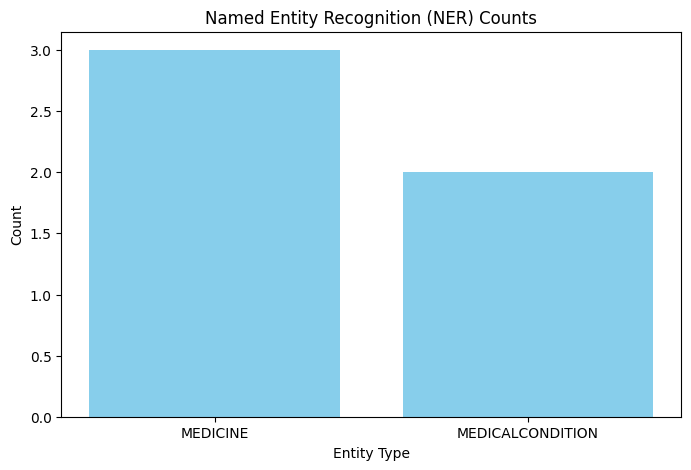

In [29]:
import matplotlib.pyplot as plt
from collections import Counter

# Count occurrences of each entity type
entity_counts = Counter([ent.label_ for ent in doc.ents])

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Named Entity Recognition (NER) Counts")
plt.show()


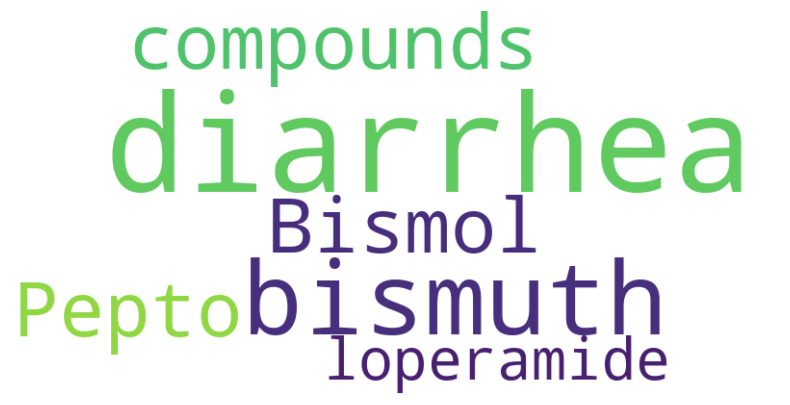

In [30]:
from wordcloud import WordCloud

# Create a text string of all recognized entities
entity_text = " ".join([ent.text for ent in doc.ents])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(entity_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
